# STATISTICAL LEARNING PROJECT

#### Step 1 - Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy

#### Step 2 - Read the data as a data frame 

In [3]:
Insurance = pd. read_csv("C:/Users/RajSri/Documents/PGP AIML GL Notebooks/7. Applied Statistics - project/insurance.csv")

In [4]:
Insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Step 3 - Performing EDA

##### Step 3.a - Shape of the data

In [6]:
Insurance.shape

(1338, 7)

###### Insight - The dataframe named as Insurance has 1338 rows and 7 columns

##### Step 3.b - Data type of each attribute 

In [7]:
Insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


##### Insight - Attributes such as age and children are of type "int" , attributes such as bmi and charges are of type "float" and attributes such as sex, smoker and region is of type object. All the attribues hae no null data

##### Step 3.c - Checking the presence of missing values

In [8]:
Insurance.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [9]:
Insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

##### Insight - Neither missing values nor "null" values present in dataframe

##### Step 3.d - 5 point summary of numerical attributes

In [10]:
Insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


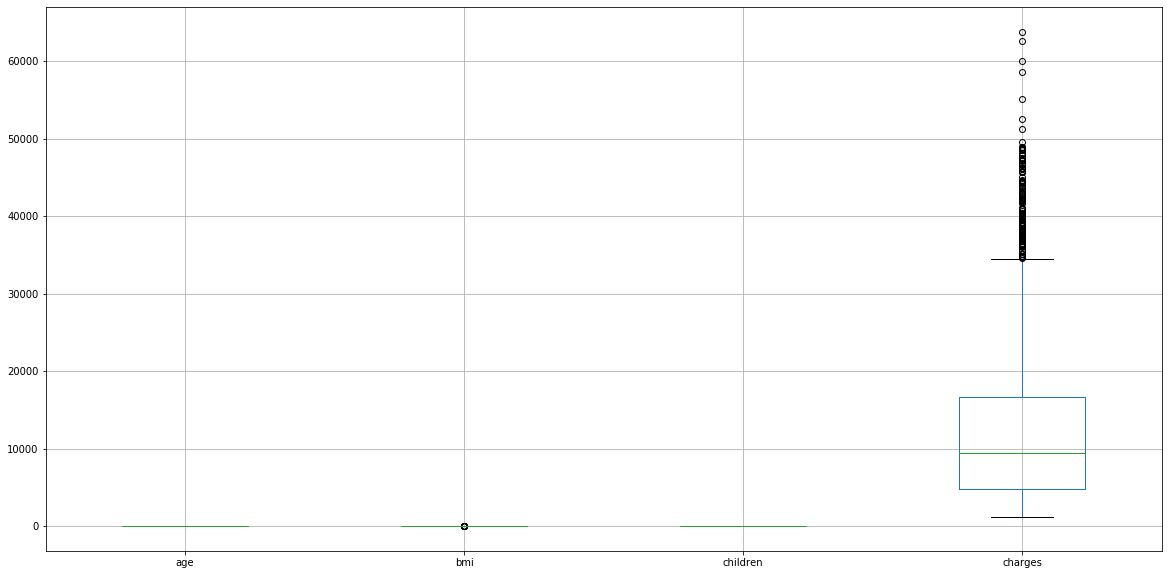

In [11]:
Insurance.boxplot(figsize=(20,10))

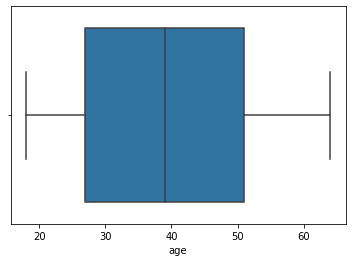

In [12]:
sns.boxplot(Insurance["age"])

##### Insight - The distribution of age is not skewed and also without any outliers

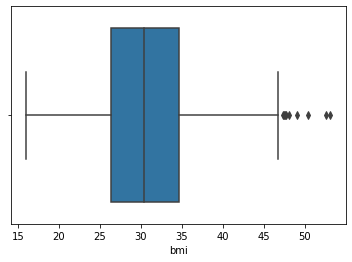

In [13]:
sns.boxplot(Insurance['bmi'])

##### Insight - The distribution of bmi is slightly skewed with few outliers

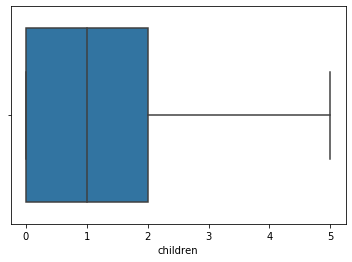

In [14]:
sns.boxplot(Insurance['children'])

##### Insight - The distribution of children is highly skewed as almost 75% of data has equal to or less than 2 children

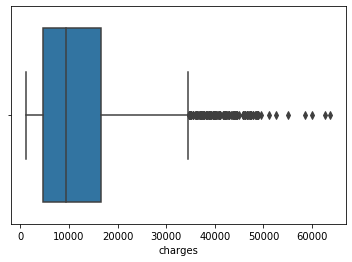

In [15]:
sns.boxplot(Insurance['charges'])

##### Insight - The distribution of charges is heavily left skewed and has high number of outliers which means only few suffer from diseases which will cost more.

##### Step 3.e - Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

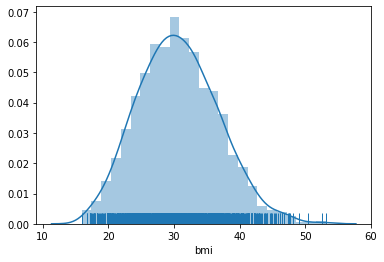

In [16]:
sns.distplot(Insurance['bmi'], rug=True)

##### Insight - The bmi is normally distributed

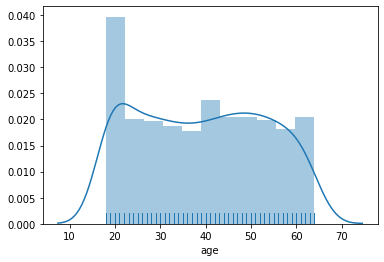

In [17]:
sns.distplot(Insurance['age'], rug=True)

##### Insight - The distribution is uniform for the dataframe and maximum number of people is around 20 yr old.

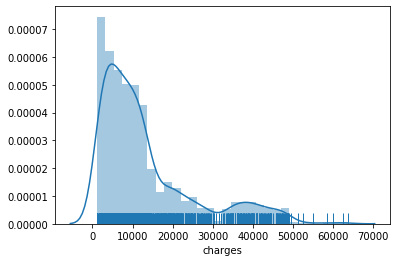

In [18]:
sns.distplot(Insurance['charges'], rug=True)

##### Insight - The distribution of charges is highly left skewed which tells us most number of people do not spend more.

##### Step 3.f - Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [19]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(Insurance.bmi),
                                       stats.skew(Insurance.age),stats.skew(Insurance.charges)]},
                        index=['bmi','age','charges'])  # Measure the skeweness of the required columns
Skewness

,Skewness
bmi,0.283729
age,0.055610
charges,1.514180


##### Insight - Skew of bmi is very less , age is uniformly distributed and there's hardly any skew, charges are highly skewed

##### Step 3.g - Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

In [20]:
#outliers for bmi

q25, q75 = np.percentile(Insurance['bmi'], 25), np.percentile(Insurance['bmi'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in Insurance['bmi'] if x < lower or x > upper]
print('Identified outliers for bmi: %d' % len(outliers))

Identified outliers for bmi: 9


In [21]:
#outliers for age

q25, q75 = np.percentile(Insurance['age'], 25), np.percentile(Insurance['age'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in Insurance['age'] if x < lower or x > upper]
print('Identified outliers for age: %d' % len(outliers))

Identified outliers for age: 0


In [22]:
#outliers for charges

q25, q75 = np.percentile(Insurance['charges'], 25), np.percentile(Insurance['charges'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in Insurance['charges'] if x < lower or x > upper]
print('Identified outliers for charges: %d' % len(outliers))

Identified outliers for charges: 139


##### Insight - There are many extreme values for 'charges' attribute as it is highly skewed. For 'bmi' it has less outliers and 'age' has zero outlier.

##### Step 3.h - Distribution of categorical columns (include children)

Categorical distribution plots:

Bivariate

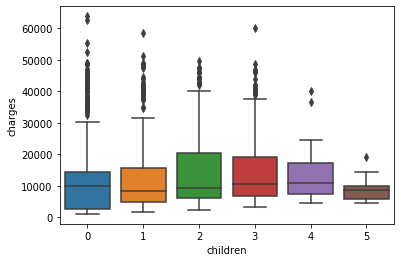

In [23]:
sns.boxplot (x = 'children' , y = 'charges' , data = Insurance)

##### Insight - In some cases, higher charges are paid by people having no child while least paid when having 5 children.

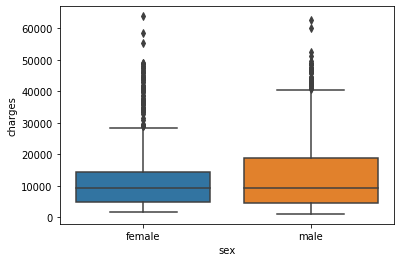

In [24]:
sns.boxplot(x='sex', y='charges', data= Insurance)

##### Insight - Female has more outliers while males have a right skew telling more of them pay higher charges.

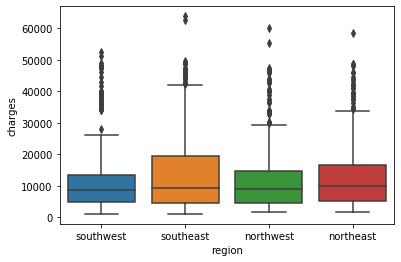

In [25]:
sns.boxplot(x='region', y='charges', data= Insurance)

##### Insight - Every attribute has high number of outliers

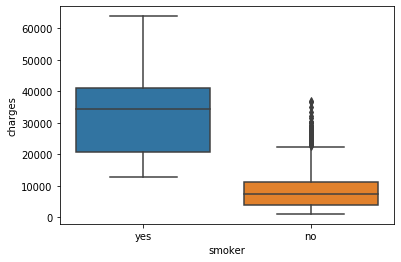

In [26]:
sns.boxplot(x='smoker', y='charges', data= Insurance)

##### Insight - Smokers pay higher charges than the non-smokers. However, outliers exists in the nonsmoker who pay higher charges.

Categorical estimate plots:

Univariate

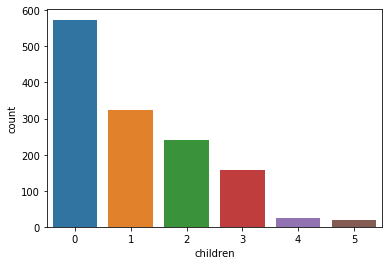

In [27]:
    sns.countplot(Insurance['children'])

##### Insight - More customers are not having children while very less have 5 children.

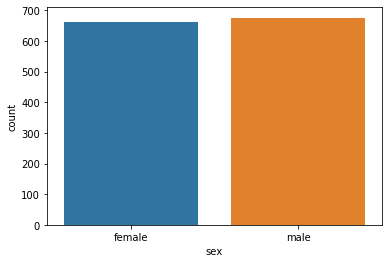

In [29]:
sns.countplot(Insurance['sex'])

##### Insight - Gender attribute has almost similiar number of data

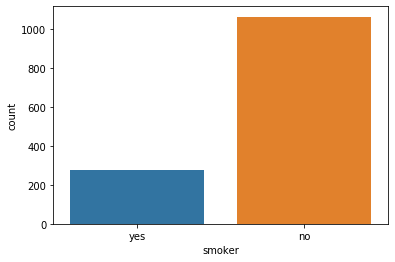

In [30]:
sns.countplot(Insurance['smoker'])

##### Insight - The count of non-smokers is quite high than the smokers

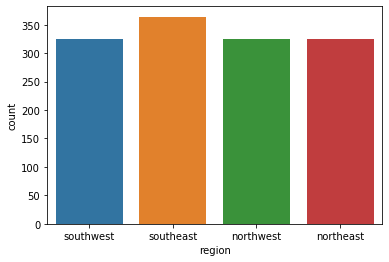

In [31]:
sns.countplot(Insurance['region'])

##### Insight - Distribution is even accross all regions.

##### 3.i - Pair plot that includes all the columns of the data frame

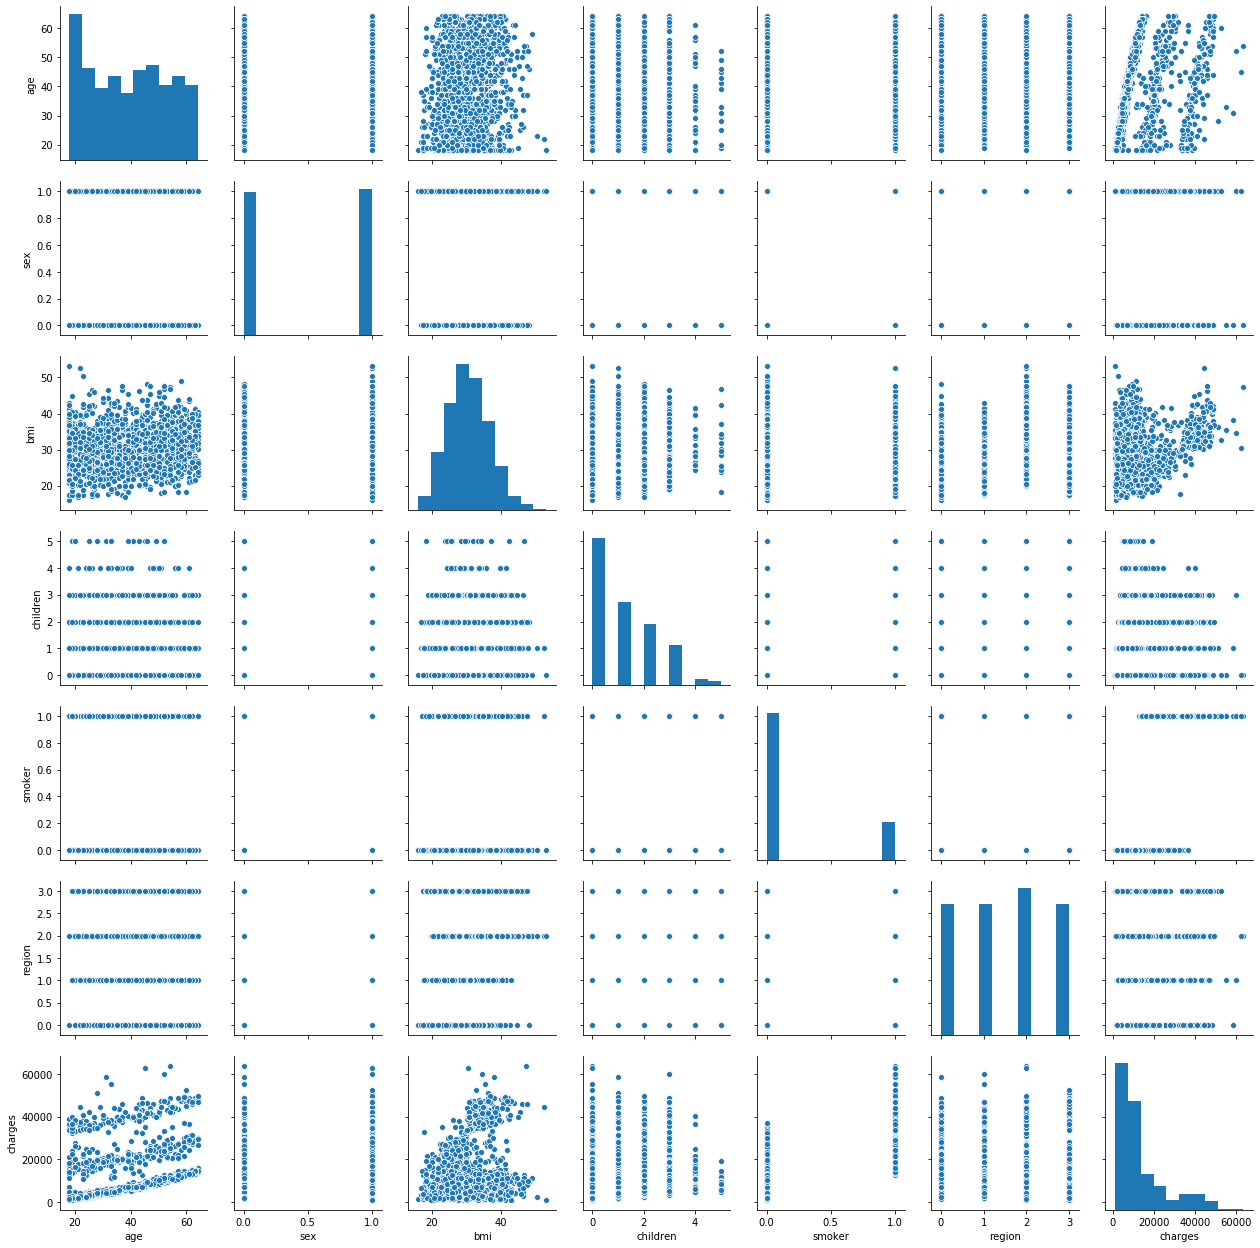

In [32]:
#Label encoding the variables before doing a pairplot because pairplot ignores strings
insurance_1 = copy.deepcopy(Insurance)
insurance_1.loc[:,['sex', 'smoker', 'region']] = Insurance.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 
sns.pairplot(insurance_1)  #pairplot
plt.show()

#### 4 - Answer the following questions with statistical evidence

##### Step 4.a - Do charges of people who smoke differ significantly from the people who don't?

In [33]:
Insurance.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

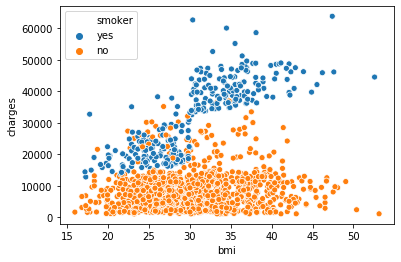

In [34]:
sns.scatterplot(Insurance.bmi, Insurance.charges,hue=Insurance.smoker)

In [35]:
#Applying T-test to determine the impact of smoking on the charges.
Ho = "Charges of smoker and non-smoker are same"   
Ha = "Charges of smoker and non-smoker are not the same"

# Selecting charges corresponding to smokers as an array
x = np.array(Insurance[Insurance.smoker == 'yes'].charges) 

# Selecting charges corresponding to non-smokers as an array
y = np.array(Insurance[Insurance.smoker == 'no'].charges)

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

print(p_value)

8.271435842177219e-283


##### Insight -  As the p_value is lesser than 0.05, we are Rejecting the null hypothesis. Smokers pay higher charges in comparison to the non-smokers.

##### Step 4.b - Does bmi of males differ significantly from that of females?

In [36]:
Insurance.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

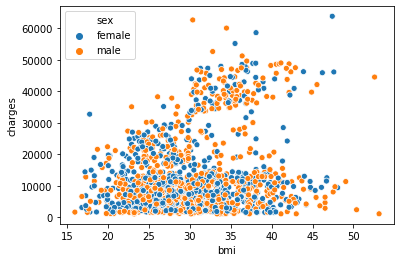

In [37]:
sns.scatterplot(Insurance['bmi'],Insurance['charges'],hue = Insurance.sex)

In [38]:
## Check dependency of bmi on gender.
Ho = "Gender has no impact on bmi"   
Ha = "Gender has an impact on bmi"   

x = np.array(Insurance[Insurance.sex == 'male'].bmi)  
y = np.array(Insurance[Insurance.sex == 'female'].bmi) 

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

print(p_value)

0.08997637178984932


##### Insight - Accepting null hypothesis as pvalue >0.05. Hence,Gender has no impact on bmi.

##### Step 4.c - Is the proportion of smokers significantly different in different genders?

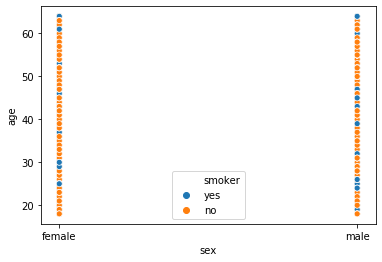

In [39]:
sns.scatterplot(Insurance['sex'] , Insurance['age'], hue = Insurance.smoker)

In [40]:
# We will perform Chi_square test to check the proportion of smokers differs as per gender.
Ho = "Gender has no effect on smoking habits" 
Ha = "Gender has an effect on smoking habits"   

crosstab = pd.crosstab(Insurance['sex'],Insurance['smoker']) 
chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)
print(p_value)

0.006548143503580696


##### Insight - Rejecting the null hypothesis as the p_value is lesser than 0.05. Hence,smoking habits differs with the gender.

##### Step 4.d - Is the distribution of bmi across women with no children, one child and two children, the same?

In [41]:
# Applying anova test to check the proportion.
Ho = "No. of children has no effect on bmi"   
Ha = "No. of children has an effect on bmi"   

df_female = copy.deepcopy(Insurance[Insurance['sex'] == 'female'])

zero = df_female[df_female.children == 0]['bmi']
one = df_female[df_female.children == 1]['bmi']
two = df_female[df_female.children == 2]['bmi']

f_stat, p_value = stats.f_oneway(zero,one,two)
print(p_value)

0.7158579926754841


##### Insight - Accepting the null hypothesis as pvalue >0.05.Hence,it tells the number of children is not effecting any difference in women bmi.